# Exploratory Data Analysis

---

**Dataset: Insurance Charges**

**A detailed look into the Insurance dataset to understand structure, detect patterns, and guide preprocessing steps.**

In [1]:
# Install Packages
!pip install pandas numpy matplotlib seaborn plotly

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Set plot styles
# Sets a clean visual style for all seaborn plots

sns.set(style = "whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [6]:
# Reading CSV file using Pandas
df = pd.read_csv('C:/Users/harsh/Downloads/AlmaBetter/EDA-ML-ALGO/insurance-charges-prediction/data/insurance.csv')
# First 5 rows to get an idea of the data structure
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Information and dimensions of dataset

print("Dataset Shape: ", df.shape, "\n")
df.info()

Dataset Shape:  (1338, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



*   .shape -> total rows & columns  
   
*   .info() -> column types, missing values, etc.



In [8]:
# Statistical Summary of Data

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



*   This shapes our expectations and alerts us to clean the data if needed.
*   summaries for numeric columns: mean, std, min, max, etc



In [10]:
# Checking for Missing and Duplicate data

print("Missing Values: \n", df.isnull().sum())
print("\nDuplicate Values: ", df.duplicated().sum())

duplicated_rows = df[df.duplicated()]
print("\nDuplicated rows:\n", duplicated_rows)


Missing Values: 
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate Values:  1

Duplicated rows:
      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631




*   isnull().sum() -> counts nulls per column  
*   duplicated().sum() -> counts exact repeated rows



In [11]:
# Cleaning Duplicate Rows (if any)

df.drop_duplicates(inplace=True)

print("Duplicate rows after cleanup: ", df.duplicated().sum())

Duplicate rows after cleanup:  0



*   No missing values
*   Found 1 duplicate row - removed using drop_duplicates()



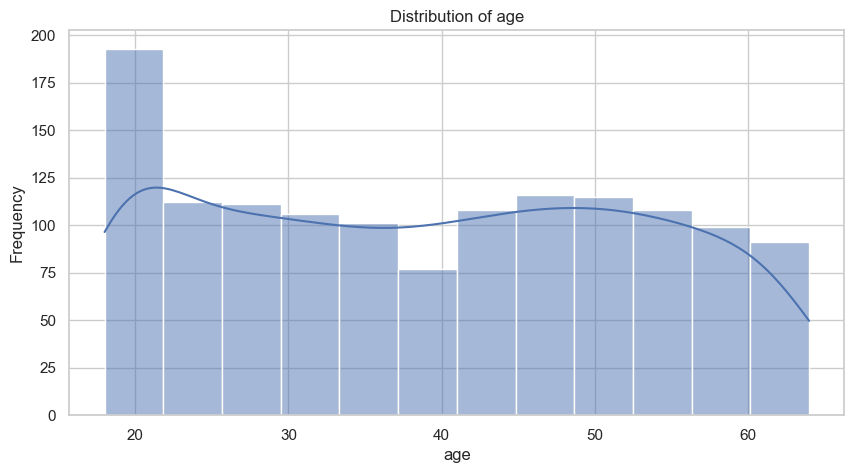

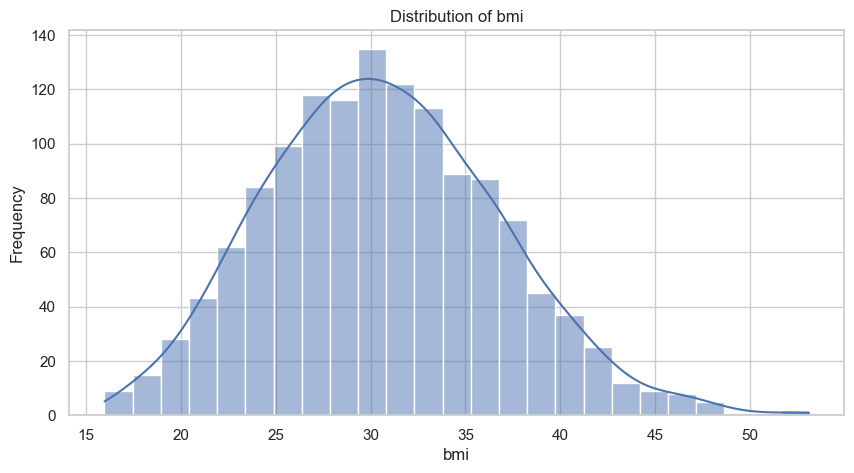

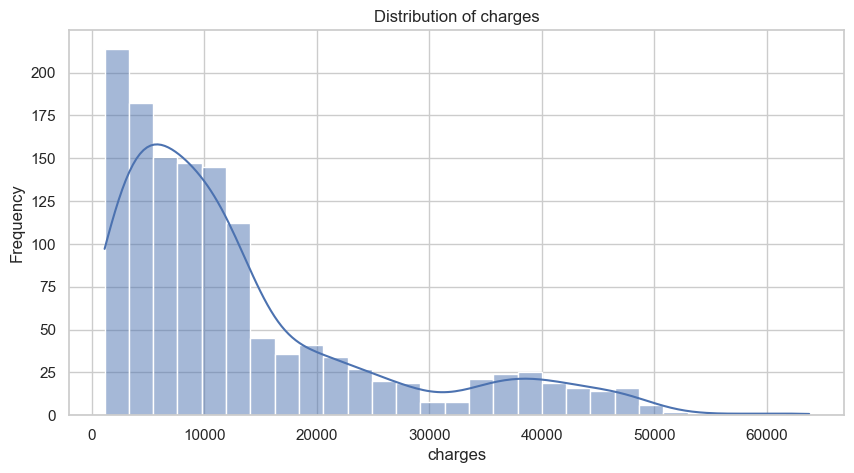

In [12]:
# Analyzing Individual Number Columns

for col in ['age', 'bmi', 'charges']:
  sns.histplot(data = df, x = col, kde = True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()



* histplot → bar graph of value frequencies  

* kde=True → smooth distribution curve

* It shows if features are normally distributed or skewed.



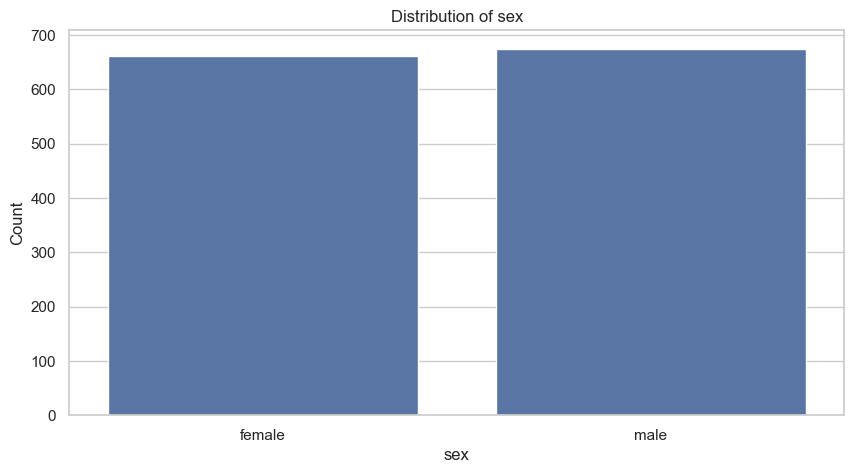

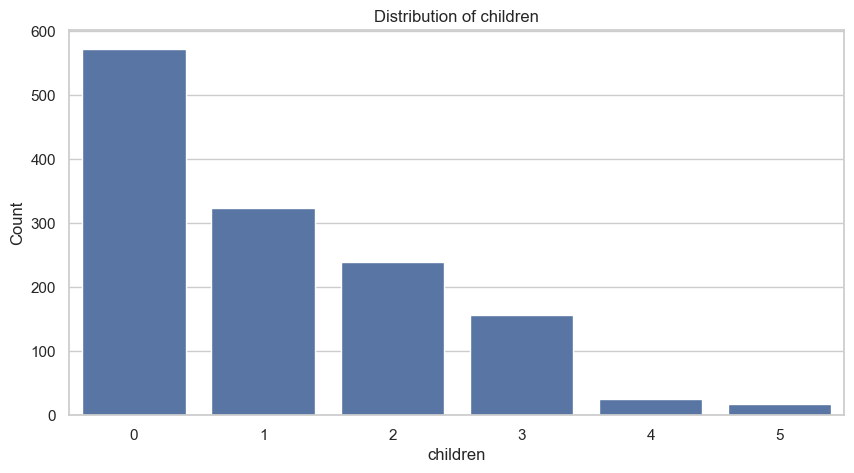

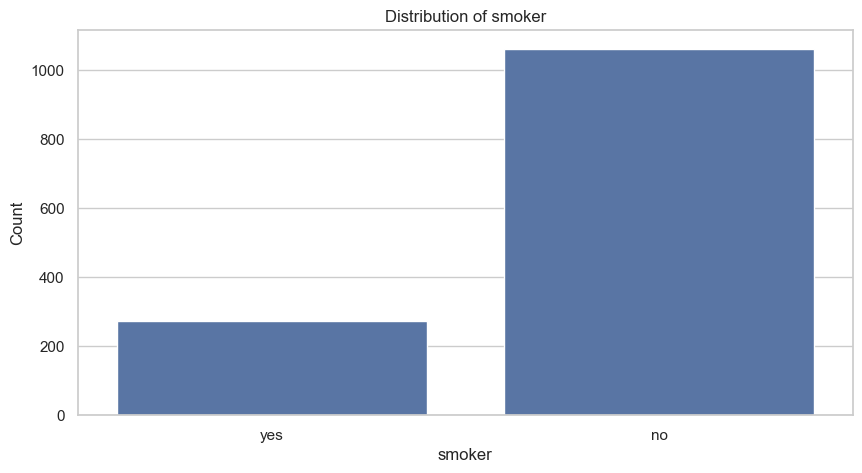

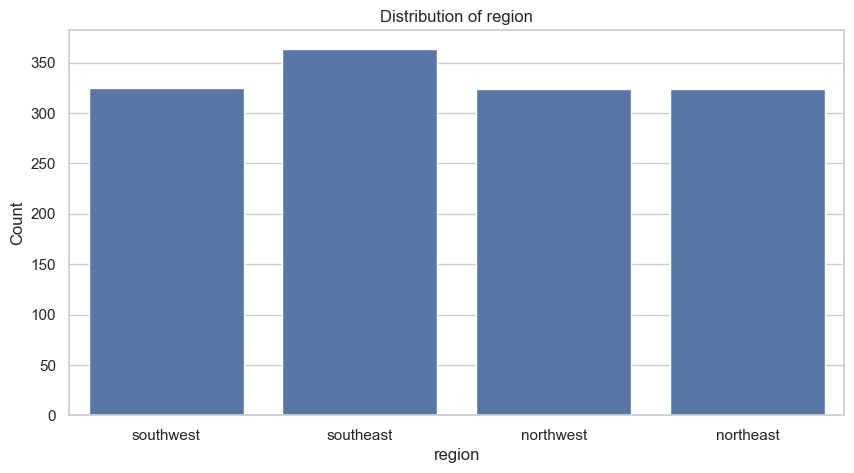

In [13]:
# Categorical Analysis

for col in ['sex', 'children', 'smoker', 'region']:
  sns.countplot(data = df, x = col)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

* countplot → bar plot of category counts
* It shows which groups dominate and where imbalance may exist.

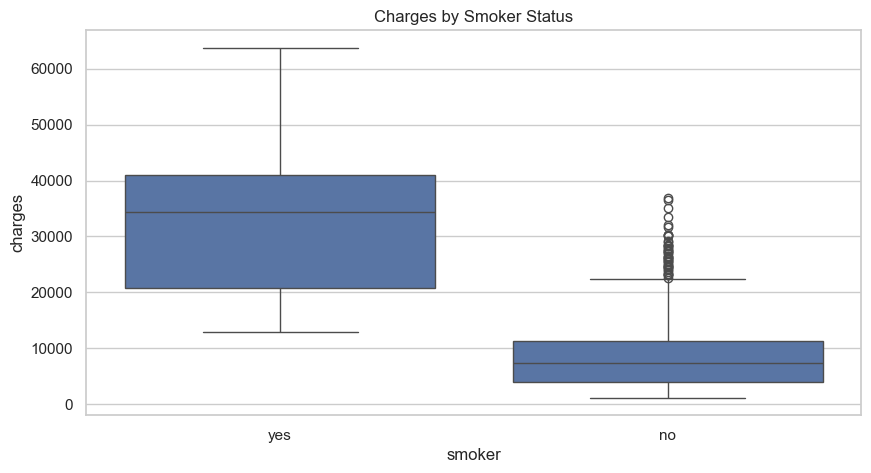

In [16]:
# Charges vs Other Features: How Charges changes with other factors

# Charges by Smoker Status
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker Status")
plt.show()

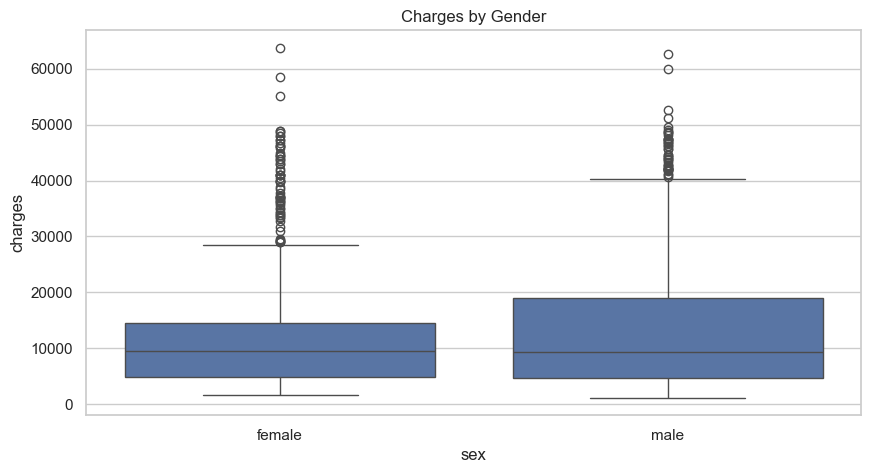

In [17]:
# Charges by Sex Status
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Gender")
plt.show()


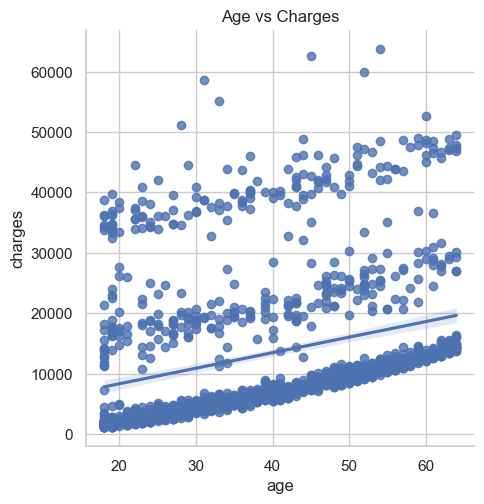

In [18]:

# Charges by Age Status
sns.lmplot(x='age', y='charges', data=df)
plt.title("Age vs Charges")
plt.show()


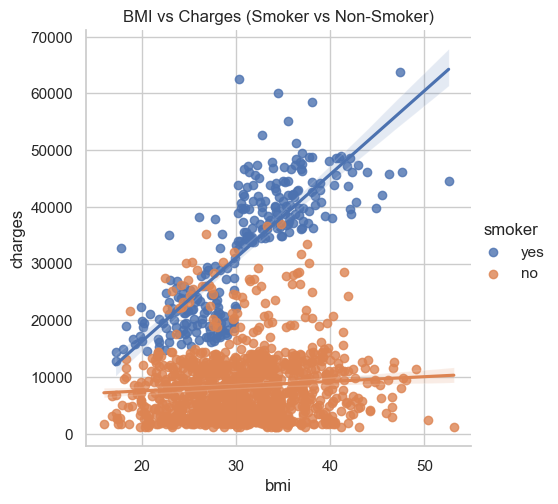

In [19]:
# Charges by BMI Status (smoker colored)
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Charges (Smoker vs Non-Smoker)")
plt.show()

* Boxplots show value range per category  
* lmplot = scatterplot + regression line
* Smoker status shows how huge are the charge gaps
* Linear trends help us guess whether age or BMI affects pricing steadily.

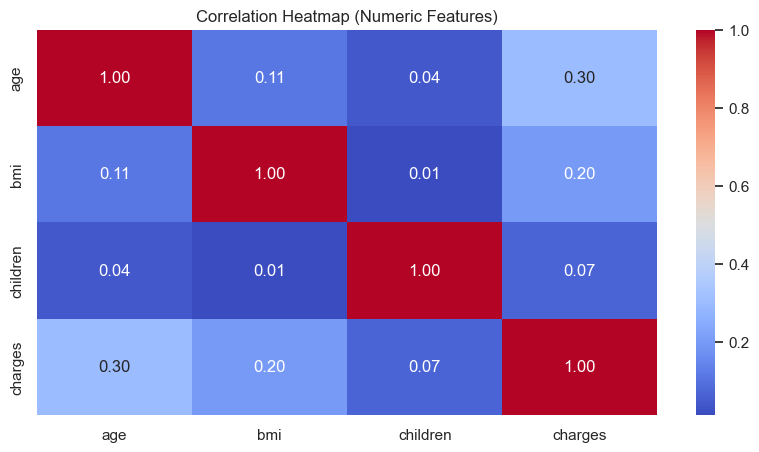

In [20]:
# Correlation Heatmap

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


* .corr() → This shows how strongly numerical columns relate to each other, using Pearson correlation coefficient.

* Heatmap Value range shows strength/direction:

  * +1 = strong positive
  * 0 = no correlation
  * -1 = strong negative

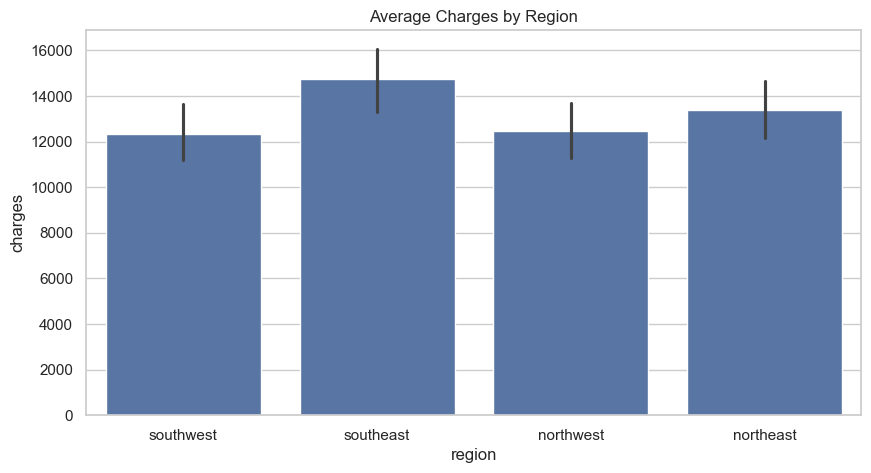

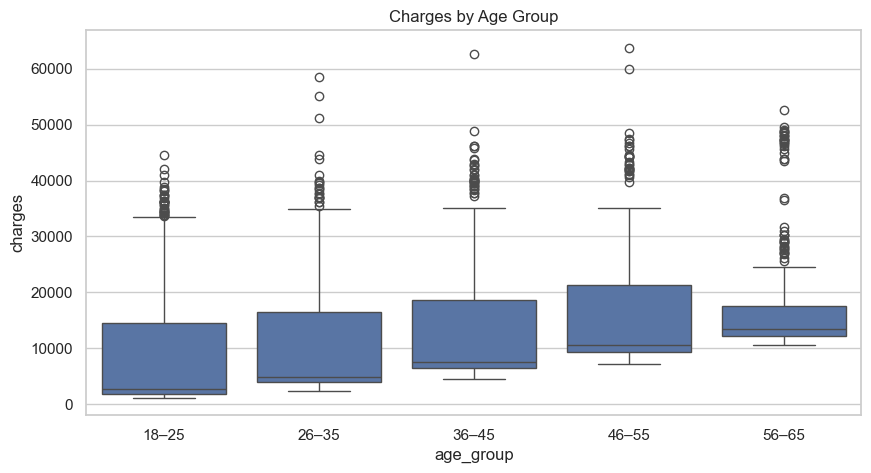

In [21]:
# Region & Age Group Analysis
# Average Charges by group

# Region-wise charges
sns.barplot(x='region', y='charges', data=df, estimator=np.mean)
plt.title("Average Charges by Region")
plt.show()

# Age-group wise charges
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65],
                  labels=["18–25", "26–35", "36–45", "46–55", "56–65"])
sns.boxplot(x='age_group', y='charges', data=df)
plt.title("Charges by Age Group")
plt.show()

* Barplot = average charges by category  
* pd.cut() groups age into buckets
* To check Impact of Age group, Regional impact

In [22]:
# Interactive Visualization

fig = px.scatter(df, x='age', y='charges', color='smoker', size='bmi',
                 hover_data=['sex', 'region'],
                 title="Interactive: Age vs Charges by Smoker")
fig.show()

* Scatterplot with custom color, size, hover using plotly

* Great for dashboards, you can zoom, explore outliers, and tell data stories interactively.


In [25]:
# Saving Cleaned Dataset

df.to_csv('C:/Users/harsh/Downloads/AlmaBetter/EDA-ML-ALGO/insurance-charges-prediction/data/cleaned_insurance.csv', index=False)